<a href="https://colab.research.google.com/github/QAppleData/FinalProject/blob/master/Lending_Club_Applegate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Part I Sampling from the whole dataset 

In [103]:
# upload data (Data source: Kaggle)
from google.colab import files
uploaded = files.upload()

Saving loan_clean.csv to loan_clean.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['loan.csv']))

In [ ]:
 # Investigate the type of loan status
 df.loan_status.value_counts().sort_index()

Charged Off                                             261655
Current                                                 919695
Default                                                     31
Does not meet the credit policy. Status:Charged Off        761
Does not meet the credit policy. Status:Fully Paid        1988
Fully Paid                                             1041952
In Grace Period                                           8952
Late (16-30 days)                                         3737
Late (31-120 days)                                       21897
Name: loan_status, dtype: int64

In [ ]:
# Filter out only the fully paid and charged off instance
df_default = df[df['loan_status'].isin (['Fully Paid','Charged Off'])]

In [ ]:
# See how many records left
df_default.shape

(1303607, 145)

In [ ]:
# Create a balanced sample dataset while maxmizing the sample number

sample_size = 260000

data = df_default.groupby('loan_status').apply(lambda x: x.sample(sample_size))

In [ ]:
#shuffle the dataframe rows

data = data.sample(frac=1) 

In [ ]:
# make sure we have 520K records
data.shape

(520000, 145)

In [ ]:
# Start with hand-picked features that should be relative to loan status (Based on full description of each fields and common sense)

features = ['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'purpose',
 'addr_state',
 'dti',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'loan_status']

#full description of each fields:

LoanStatNew	 | Description
--- | ---
zip_code	|The first 3 numbers of the zip code provided by the borrower in the loan application.
addr_state	|The state provided by the borrower in the loan application
annual_inc|	The annual income provided by the borrower during registration.
collection_recovery_fee |	post charge off collection fee
collections_12_mths_ex_med |	Number of collections in 12 months excluding medical collections
delinq_2yrs	|The number of 30+ days past-due incidences of delinquency in the borrower’s credit file for the past 2 years
desc |	Loan description provided by the borrower
dti	| A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line	|The month the borrower’s earliest reported credit line was opened
emp_length|	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
emp_title|	The job title supplied by the Borrower when applying for the loan.
fico_range_high	|The upper boundary of range the borrower’s FICO belongs to.
fico_range_low|	The lower boundary of range the borrower’s FICO belongs to.
funded_amnt |	The total amount committed to that loan at that point in time.
funded_amnt_inv|	The total amount committed by investors for that loan at that point in time.
grade |	LC assigned loan grade
home_ownership|	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
id |	A unique LC assigned ID for the loan listing.
initial_list_status |	The initial listing status of the loan. Possible values are – W, F
inq_last_6mths |	The number of inquiries by creditors during the past 6 months.
installment	| The monthly payment owed by the borrower if the loan originates.
int_rate |	Interest Rate on the loan
is_inc_v |	Indicates if income was verified by LC, not verified, or if the income source was verified
issue_d	 | The month which the loan was funded
last_credit_pull_d |	The most recent month LC pulled credit for this loan
last_fico_range_high |	The last upper boundary of range the borrower’s FICO belongs to pulled.
last_fico_range_low |	The last lower boundary of range the borrower’s FICO belongs to pulled.
last_pymnt_amnt	| Last total payment amount received
last_pymnt_d |	Last month payment was received
loan_amnt |	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
loan_status |	Current status of the loan
member_id |	A unique LC assigned Id for the borrower member.
mths_since_last_delinq	| The number of months since the borrower’s last delinquency.
mths_since_last_major_derog	| Months since most recent 90-day or worse rating
mths_since_last_record |	The number of months since the last public record.
next_pymnt_d	| Next scheduled payment date
open_acc	| The number of open credit lines in the borrower’s credit file.
out_prncp |	Remaining outstanding principal for total amount funded
out_prncp_inv	| Remaining outstanding principal for portion of total amount funded by investors
policy_code |	Publicly available policy_code=1, new products not publicly available policy_code=2
pub_rec	|Number of derogatory public records
purpose	| A category provided by the borrower for the loan request.
pymnt_plan |	Indicates if a payment plan has been put in place for the loan
recoveries |	post charge off gross recovery
revol_bal |	Total credit revolving balance
revol_util|	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
sub_grade |	LC assigned loan subgrade
term	| The number of payments on the loan. Values are in months and can be either 36 or 60.
title |	The loan title provided by the borrower
total_acc	| The total number of credit lines currently in the borrower’s credit file
total_pymnt	|Payments received to date for total amount funded
total_pymnt_inv |	Payments received to date for portion of total amount funded by investors
total_rec_int	| Interest received to date
total_rec_late_fee|	Late fees received to date
total_rec_prncp	| Principal received to date
url	| URL for the LC page with listing data.

In [ ]:
df_clean = data.loc[:, data.columns.isin(features)]

In [ ]:
df_clean.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,0.0,520000.000000,520000.000000,520000.000000,520000.000000,520000.000000,5.200000e+05,519883.000000,520000.000000,520000.000000,520000.000000,5.200000e+05,519690.000000,520000.000000,520000.0,520000.0,520000.000000,520000.000000,520000.000000,520000.000000
mean,NaN,14843.567548,14835.311587,14810.954410,14.177889,448.191886,7.395996e+04,18.990014,0.705150,11.718988,0.227308,1.591853e+04,53.000990,24.929212,0.0,0.0,12337.672171,12317.166127,9248.838602,2499.253099
std,NaN,8749.542359,8745.513938,8748.356923,4.956628,261.688736,6.722599e+04,11.678638,0.971123,5.533693,0.623367,2.117054e+04,24.275161,12.044287,0.0,0.0,9661.024753,9657.256769,8340.504618,2647.194724
min,NaN,500.000000,500.000000,0.000000,5.310000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,NaN,8000.000000,8000.000000,8000.000000,10.900000,259.690000,4.500000e+04,12.400000,0.000000,8.000000,0.000000,5.971000e+03,35.000000,16.000000,0.0,0.0,5218.089735,5200.667500,2875.170000,796.880000
50%,NaN,13000.000000,13000.000000,12925.000000,13.660000,385.740000,6.300000e+04,18.410000,0.000000,11.000000,0.000000,1.111750e+04,53.600000,23.000000,0.0,0.0,9746.450000,9724.495000,6569.455000,1643.740000
75%,NaN,20000.000000,20000.000000,20000.000000,17.140000,590.040000,8.900000e+04,24.940000,1.000000,15.000000,0.000000,1.950200e+04,71.700000,32.000000,0.0,0.0,16903.503309,16886.392500,13000.000000,3212.387500
max,NaN,40000.000000,40000.000000,40000.000000,30.990000,1717.630000,9.500000e+06,999.000000,8.000000,86.000000,86.000000,2.568995e+06,366.600000,176.000000,0.0,0.0,62884.797382,62862.510000,40000.000000,27884.800000


# Part II Data cleaning and EDA
### Exported df_clean to cvs file "loan_clean.cvs"

In [ ]:
# upload data (Data source: Kaggle)
from google.colab import files
uploaded = files.upload()

Saving loan_clean.csv to loan_clean.csv


In [105]:
import io
df = pd.read_csv(io.BytesIO(uploaded['loan_clean.csv']))

# Data Cleaning

In [ ]:
# Drop a few features for :

del df['id'] # meanless feature
del df['inq_last_6mths'] # most value is 0
del df['pub_rec'] # more than 75% values is 0
del df['out_prncp'] # all value 0
del df['out_prncp_inv'] # all value 0

In [ ]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,520000.000000,520000.000000,520000.000000,520000.000000,520000.000000,5.200000e+05,519883.000000,520000.000000,5.200000e+05,519690.000000,520000.000000,520000.000000,520000.000000,520000.000000,520000.000000
mean,14843.567548,14835.311587,14810.954410,14.177889,448.191886,7.395996e+04,18.990014,11.718988,1.591853e+04,53.000990,24.929212,12337.672171,12317.166127,9248.838602,2499.253099
std,8749.542359,8745.513938,8748.356923,4.956628,261.688736,6.722599e+04,11.678638,5.533693,2.117054e+04,24.275161,12.044287,9661.024753,9657.256769,8340.504618,2647.194724
min,500.000000,500.000000,0.000000,5.310000,16.080000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,10.900000,259.690000,4.500000e+04,12.400000,8.000000,5.971000e+03,35.000000,16.000000,5218.089735,5200.667500,2875.170000,796.880000
50%,13000.000000,13000.000000,12925.000000,13.660000,385.740000,6.300000e+04,18.410000,11.000000,1.111750e+04,53.600000,23.000000,9746.450000,9724.495000,6569.455000,1643.740000
75%,20000.000000,20000.000000,20000.000000,17.140000,590.040000,8.900000e+04,24.940000,15.000000,1.950200e+04,71.700000,32.000000,16903.503309,16886.392500,13000.000000,3212.387500
max,40000.000000,40000.000000,40000.000000,30.990000,1717.630000,9.500000e+06,999.000000,86.000000,2.568995e+06,366.600000,176.000000,62884.797382,62862.510000,40000.000000,27884.800000


In [ ]:
# loan amount commited by investor should be greater than 0
df=df[df.funded_amnt_inv > 0]

In [ ]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,earliest_cr_line,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
0,6350,6350,6350.0,36 months,14.99,220.10,C,4 years,RENT,110000.0,Source Verified,Fully Paid,debt_consolidation,NY,11.98,Feb-2008,6.0,2375,52.8,14.0,7941.029680,7941.03,6350.00,1576.03
1,15000,15000,15000.0,60 months,15.31,359.30,C,5 years,MORTGAGE,63280.0,Source Verified,Fully Paid,home_improvement,TX,9.07,Aug-2007,5.0,1136,23.2,7.0,17653.570004,17653.57,15000.00,2653.57
2,8000,8000,8000.0,36 months,7.26,247.97,A,10+ years,MORTGAGE,56000.0,Source Verified,Charged Off,debt_consolidation,AL,23.24,Apr-2002,14.0,4025,10.2,27.0,1727.720000,1727.72,1422.60,305.12
3,10000,10000,10000.0,60 months,14.47,235.13,C,5 years,OWN,25000.0,Source Verified,Charged Off,debt_consolidation,TX,22.85,Aug-1983,10.0,8296,12.4,24.0,9890.460000,9890.46,6213.89,3661.57
4,23000,23000,23000.0,60 months,19.19,599.04,E,2 years,RENT,95000.0,Source Verified,Charged Off,debt_consolidation,VA,19.67,Dec-2002,16.0,9118,63.8,36.0,16678.800000,16678.80,6399.33,7953.11


In [ ]:
# use a smaller dataset for training model
sample_size = 25000

data_small = df.groupby('loan_status').apply(lambda x: x.sample(sample_size))

In [ ]:
data_small.to_csv('loan_small.csv',index=False)
files.download('loan_small.csv')

##EDA of Data_Small

In [3]:
#Using data_small 
#This part orignally used dataset "loan_clean" which has 520,000 records. 
#It was extremely slow for model training therefore I sampled a even smaller dataset called "loan_small" (uploaded to Github)
# The dataframe is called "data_small" 
url = 'https://raw.githubusercontent.com/QAppleData/FinalProject/master/loan_small.csv'
data_small = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


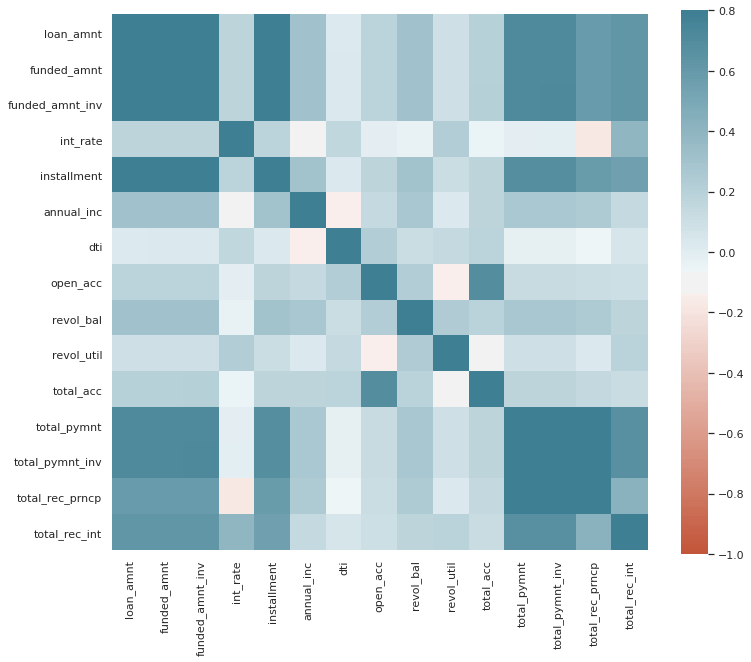

In [4]:
#correlation matrix to investigate numerical features/ HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

corrmat = data_small.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat,vmin=-1, vmax=.8, 
            cmap=sns.diverging_palette(20, 220, n=200),square=True);

## Investigate Categorical Features

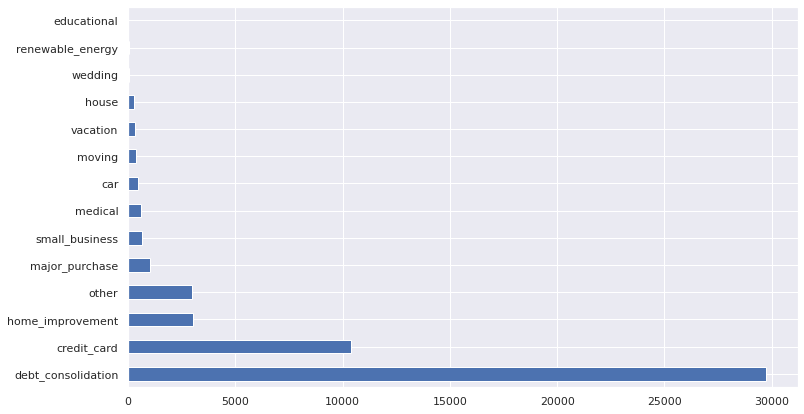

In [5]:
# For what reason people are borrowing money?

plt.figure(figsize=(12, 7))
  
data_small["purpose"].value_counts().plot(kind='barh')

In [6]:
# People from where are borrowing money?
df_location = data_small.groupby("addr_state",).sum().reset_index()
df_location = df_location.filter(["addr_state", "loan_amnt"], axis = 1)

In [7]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df_location['addr_state'], # Spatial coordinates
    z = df_location['loan_amnt'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = 'Total amount issued by State',
    geo_scope='usa', # limited map scope to USA
)

fig.show()

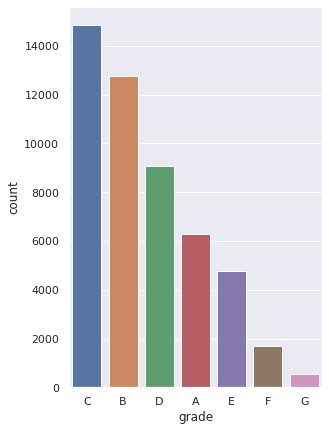

In [8]:
# Grade of loan
plt.figure(figsize=(10, 7))
  
plt.subplot(1, 2, 1)
sns.countplot(x="grade", data= data_small, order = data_small['grade'].value_counts().index)

In [9]:
list(data_small.select_dtypes(object))

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line']

In [10]:
# conver term into numerical
col_cat = ['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose']
for feature in col_cat:
  print(data_small[feature].value_counts().sort_values(ascending=False))

 36 months    35195
 60 months    14805
Name: term, dtype: int64
C    14860
B    12773
D     9083
A     6271
E     4773
F     1690
G      550
Name: grade, dtype: int64
10+ years    16048
2 years       4484
< 1 year      4164
3 years       3881
1 year        3341
5 years       3127
4 years       2940
8 years       2277
7 years       2257
6 years       2243
9 years       1936
Name: emp_length, dtype: int64
MORTGAGE    23413
RENT        21222
OWN          5350
ANY             8
OTHER           6
NONE            1
Name: home_ownership, dtype: int64
Source Verified    19880
Verified           16634
Not Verified       13486
Name: verification_status, dtype: int64
Charged Off    25000
Fully Paid     25000
Name: loan_status, dtype: int64
debt_consolidation    29716
credit_card           10388
home_improvement       3019
other                  2981
major_purchase         1041
small_business          667
medical                 587
car                     482
moving                  397
vacation

In [11]:
#convert emp_length into numerical (number of years, 10+ year becomes 10, less than a year becomes 0)

data_small['emp_length'] = data_small['emp_length'].replace(['< 1 year','10+ years'],['0 year','10 year'])
data_small['emp_length']= data_small['emp_length'].str[0:2]
data_small['emp_length'] = data_small['emp_length'].astype(float)

In [12]:
# Deal with HomeOwnership (convert to 1 to 5)
Home_mapper = {'OWN':1,'MORTGAGE':2,'RENT':3,'ANY':4,'OTHER':4,'NONE':5}
data_small['home_ownership'] = data_small['home_ownership'].map(Home_mapper)

In [13]:
# Deal with "earliest_cr_line" The month the borrower’s earliest reported credit line was opened
# Convert the Month-Year into how many months ago credit line opened

data_small['cr_month'] = data_small['earliest_cr_line'].str[0:3]#get month

Mon_mapper = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}#dict of month name to number

data_small['cr_month'] = data_small['cr_month'].map(Mon_mapper)#convert month

data_small['cr_year'] = data_small['earliest_cr_line'].str[4:8]#get year

data_small['cr_year'] = data_small['cr_year'].astype(int)# convert year

data_small['earliest_cr_line_months']= (2016-data_small['cr_year'])*12 - data_small['cr_month']# how many month ago from 2016

In [14]:
# no longer need year month and cr_line
del data_small['cr_year']
del data_small['cr_month']
del data_small['earliest_cr_line']

In [16]:
#move label to the last column
label = data_small['loan_status']
del data_small['loan_status']
data_small['loan_status'] = label

In [17]:
#lable encoder 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data_small['loan_status'])
le.transform(data_small['loan_status'])
data_small['loan_status']=le.fit_transform(data_small['loan_status'])

In [18]:
# see how I did!
data_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                50000 non-null  int64  
 1   funded_amnt              50000 non-null  int64  
 2   funded_amnt_inv          50000 non-null  float64
 3   term                     50000 non-null  object 
 4   int_rate                 50000 non-null  float64
 5   installment              50000 non-null  float64
 6   grade                    50000 non-null  object 
 7   emp_length               46698 non-null  float64
 8   home_ownership           50000 non-null  int64  
 9   annual_inc               50000 non-null  float64
 10  verification_status      50000 non-null  object 
 11  purpose                  50000 non-null  object 
 12  addr_state               50000 non-null  object 
 13  dti                      49991 non-null  float64
 14  open_acc              

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
#get lists of numeric features:
list(data_small.select_dtypes(np.number))

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'dti',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'earliest_cr_line_months',
 'loan_status']

In [21]:
num_features = ['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'dti',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'earliest_cr_line_months']

In [22]:
#get lists of categortical features:
cat_features = list(data_small.select_dtypes(object))

In [23]:
# Create DataPipelines:
# For Numerical features:
num_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
    ])
# For Categorical features:
cat_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'NotApp')), #Use an alternative value to indicate NA in the dataset
    ('OneHot', OneHotEncoder())
    ])

In [24]:
data_preprocessor  = ColumnTransformer(
    transformers = [
        ('numerical', num_transformer, num_features),
        ('categorical', cat_transformer, cat_features)
    ])

# Part III Data Transformation & Feature selection

In [26]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
rf_estimator = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=1)
rfe_rfr = RFE(estimator= rf_estimator , # use RandomeForestRegressor to select features
          verbose=1, 
          n_features_to_select= 50 #select 50 most important features.
         )

In [ ]:
data_prep_pipeline  = Pipeline(steps=[('preprocessor', data_preprocessor), #This performs the data preparation steps in the cell above
                                      ('feature_selection',  rfe_rfr)#TODO: identify a feature selection algorithm or exclude this line if you have previously performed feature selection on the data.  
                                                                     # I tried both SVM and RFRressor to eliminate features, RFR worked a lot better                   
                    ])

transformed_data    = data_prep_pipeline.fit_transform(data_small.iloc[:, :-1], data_small['loan_status']) #transform the data

In [28]:
transformed_data.shape

(50000, 50)

# Part IV Build the model

In [29]:
# Split data for cross-validation

from sklearn.model_selection import train_test_split

X = transformed_data

y = data_small['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=.30)

### Random Forest Model

In [41]:
# Build Random forest model
# use the best parameters found by random search in the next cell
# {'random_state': 50, 'n_estimators': 100, 'min_samples_split': 2, 'max_features': 20, 'max_depth': 100, 'criterion': 'entropy'}
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(criterion= 'entropy' ,  
                                    max_depth= 100,     
                                    max_features= 20 ,  
                                    min_samples_split= 2, 
                                    n_estimators= 100 , 
                                    random_state= 50 
                                    )
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9961333333333333

In [40]:
# Ramdon Search parameters...
params = {
    'criterion': ['entropy','gini'],
    'max_depth': [50,100], 
    'max_features':[10,20] , 
    'min_samples_split':[2], 
    'n_estimators' : [100,200],
    'random_state':[50,100]
    }

from sklearn.model_selection import RandomizedSearchCV
ran_search = RandomizedSearchCV (estimator=rf_classifier, 
                                 param_distributions=params, 
                                 n_iter=10,
                                 scoring='accuracy', 
                                 verbose=3, 
                                 cv=10,
                                 ) 


estimator = ran_search.fit(X_train, y_train)


print('Best parameters:', estimator.best_params_)
print('Best score:', estimator.best_score_) #note: if the score is low, increase n_iter or adjust the values in step 5.

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] random_state=100, n_estimators=100, min_samples_split=2, max_features=10, max_depth=50, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_state=100, n_estimators=100, min_samples_split=2, max_features=10, max_depth=50, criterion=entropy, score=0.994, total=  22.0s
[CV] random_state=100, n_estimators=100, min_samples_split=2, max_features=10, max_depth=50, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.1s remaining:    0.0s


[CV]  random_state=100, n_estimators=100, min_samples_split=2, max_features=10, max_depth=50, criterion=entropy, score=0.991, total=  22.4s
[CV] random_state=100, n_estimators=100, min_samples_split=2, max_features=10, max_depth=50, criterion=entropy 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.4s remaining:    0.0s


[CV]  random_state=100, n_estimators=100, min_samples_split=2, max_features=10, max_depth=50, criterion=entropy, score=0.993, total=  22.5s
[CV] random_state=100, n_estimators=100, min_samples_split=2, max_features=10, max_depth=50, criterion=entropy 
[CV]  random_state=100, n_estimators=100, min_samples_split=2, max_features=10, max_depth=50, criterion=entropy, score=0.993, total=  22.6s
[CV] random_state=100, n_estimators=100, min_samples_split=2, max_features=10, max_depth=50, criterion=entropy 
[CV]  random_state=100, n_estimators=100, min_samples_split=2, max_features=10, max_depth=50, criterion=entropy, score=0.989, total=  22.4s
[CV] random_state=100, n_estimators=100, min_samples_split=2, max_features=10, max_depth=50, criterion=entropy 
[CV]  random_state=100, n_estimators=100, min_samples_split=2, max_features=10, max_depth=50, criterion=entropy, score=0.993, total=  22.7s
[CV] random_state=100, n_estimators=100, min_samples_split=2, max_features=10, max_depth=50, criterion=e

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 58.3min finished


Best parameters: {'random_state': 50, 'n_estimators': 100, 'min_samples_split': 2, 'max_features': 20, 'max_depth': 100, 'criterion': 'entropy'}
Best score: 0.9959142857142858


In [42]:
from sklearn.metrics import classification_report,confusion_matrix
predictions_rf = rf_classifier.predict(X_test)

In [43]:
print(confusion_matrix(y_test,predictions_rf))

[[7377   58]
 [   0 7565]]


In [44]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7435
           1       0.99      1.00      1.00      7565

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



## Nerual Network model

In [45]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50))
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [51]:
predictions_mlp = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions_mlp))

[[7384   51]
 [   6 7559]]


In [52]:
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7435
           1       0.99      1.00      1.00      7565

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



# Part V Prediction with Hold-Out Data

In [107]:
# load Hold-out testing set
sample_size = 5000

df_test = df.groupby('loan_status').apply(lambda x: x.sample(sample_size))

In [108]:
# Clean_up and prepare for predition
del df_test['id'] # meanless feature
del df_test['inq_last_6mths'] # most value is 0
del df_test['pub_rec'] # more than 75% values is 0
del df_test['out_prncp'] # all value 0
del df_test['out_prncp_inv'] # all value 0

In [109]:
df_test['emp_length'] = df_test['emp_length'].replace(['< 1 year','10+ years'],['0 year','10 years'])
df_test['emp_length']= df_test['emp_length'].str[0:2]
df_test['emp_length'] = df_test['emp_length'].astype(float)

In [110]:
Home_mapper = {'OWN':1,'MORTGAGE':2,'RENT':3,'ANY':4,'OTHER':4,'NONE':5}
df_test['home_ownership'] = df_test['home_ownership'].map(Home_mapper)

In [112]:
df_test['cr_month'] = df_test['earliest_cr_line'].str[0:3]#get month

Mon_mapper = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}#dict of month name to number

df_test['cr_month'] = df_test['cr_month'].map(Mon_mapper)#convert month

df_test['cr_year'] = df_test['earliest_cr_line'].str[4:8]#get year

df_test['cr_year'] = df_test['cr_year'].astype(int)# convert year

df_test['earliest_cr_line_months']= (2016-df_test['cr_year'])*12 - df_test['cr_month']# how many month ago from 2016

In [114]:
del df_test['cr_year']
del df_test['cr_month']
del df_test['earliest_cr_line']

In [115]:
#lable encoder 
label = df_test['loan_status']
del df_test['loan_status']
df_test['loan_status'] = label
le.fit(df_test['loan_status'])
le.transform(df_test['loan_status'])
df_test['loan_status']=le.fit_transform(df_test['loan_status'])

In [116]:
df_test.head()

loan_amnt  ...  loan_status
loan_status                    ...             
Charged Off 408671      15000  ...            0
            98920       21150  ...            0
            92544       10000  ...            0
            426497      10000  ...            0
            58194       28000  ...            0

[5 rows x 24 columns]

In [ ]:
transformed_test_data    = data_prep_pipeline.fit_transform(df_test.iloc[:, :-1], df_test['loan_status']) 

In [118]:
X_HoldOut = transformed_test_data
y_HoldOut = df_test['loan_status']

In [119]:
predictions_rf_HO = rf_classifier.predict(X_HoldOut)
print(classification_report(y_HoldOut,predictions_rf_HO))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5000
           1       0.99      1.00      1.00      5000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [120]:
predictions_mlp_HO = mlp.predict(X_HoldOut)
print(classification_report(y_HoldOut,predictions_mlp_HO))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      5000
           1       0.98      0.84      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

